# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
from scipy.stats import linregress
import scipy.stats as st
from scipy.constants import convert_temperature

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [14]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
#RESET TO SIZE=1500 BEFORE FINAL COMMIT
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = list(zip(lats, lngs))

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

In [15]:
lat_lngs

[(6.420279254921013, -48.99256262086891),
 (-84.56522927222048, -40.33023310427737),
 (-87.2453696771508, 40.2654917098248),
 (46.61064034504511, -99.28088544029045),
 (11.275500348021822, -114.96214345668571),
 (-13.038194167295742, -56.819044922559044),
 (0.24647806693947416, -59.9986315170362),
 (43.81302988070118, 19.34086926510483),
 (-82.64037648561604, -136.82403365276286),
 (70.06913829410146, -32.12444443049213),
 (3.945733626697418, -163.02060513170832),
 (72.04770947935958, 14.717552898294201),
 (76.43760607715436, 142.98304107854153),
 (-40.5272180776586, -109.23374601007737),
 (30.23563555149549, -50.278603708196044),
 (-54.75739941604545, -29.445170251004015),
 (13.980851605855108, -75.0751008110949),
 (88.6054665461453, 135.037431809731),
 (-78.32421988741547, 164.20269325592403),
 (57.116318679642575, -15.47930031395228),
 (76.24261817172021, -90.35954541390575),
 (12.935504149459163, -111.30472085900244),
 (88.2009035824569, 151.44683990334056),
 (43.00605126185005, 11

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [16]:
url = "http://api.openweathermap.org/data/2.5/weather?"

clouds=[]
country=[]
date=[]
humidity=[]
lat=[]
lng=[]
max_temp=[]
wind_speed=[]

# Make a request for each of the indices

for x in range(len(cities)):
    print(f"Making request number: {x} for ID: {cities[x]}")   
    
    # Get one of the posts
    weather_response = requests.get(url + "lat=" + str(lats[x]) + "&lon=" + str(lngs[x]) +  "&APPID=" + weather_api_key).json()
    if 'clouds' in weather_response:
        clouds.append(weather_response['clouds']['all'])
    else:
        clouds.append('NaN')
    if 'sys' in weather_response and 'country' in weather_response['sys']:
        country.append(weather_response['sys']['country'])
    else:
        country.append('NaN')
    if 'dt' in weather_response:
        date.append(weather_response['dt'])
    else:
        date.append('NaN')
    if 'main' in weather_response:
        humidity.append(weather_response['main']['humidity'])
    else:
        humidity.append('NaN')
    if 'coord' in weather_response:
        lat.append(weather_response['coord']['lat'])
    else:
        lat.append('NaN')
    if 'coord' in weather_response:
        lng.append(weather_response['coord']['lon'])
    else:
        lng.append('NaN')
    if 'main' in weather_response:
        max_temp.append(convert_temperature(np.array((weather_response['main']['temp_max'])), 'Kelvin', 'Fahrenheit'))
    else:
        max_temp.append('NaN')
    if 'wind' in weather_response:
        mph=round(((weather_response['wind']['speed'])*2.237),2)
        wind_speed.append(mph)
    else:
        wind_speed.append('NaN')


#QUESTION: how to get around an empty field in the json get

Making request number: 0 for ID: cayenne
Making request number: 1 for ID: ushuaia
Making request number: 2 for ID: port alfred
Making request number: 3 for ID: jamestown
Making request number: 4 for ID: cabo san lucas
Making request number: 5 for ID: nortelandia
Making request number: 6 for ID: boa vista
Making request number: 7 for ID: visegrad
Making request number: 8 for ID: rikitea
Making request number: 9 for ID: tasiilaq
Making request number: 10 for ID: hilo
Making request number: 11 for ID: andenes
Making request number: 12 for ID: chokurdakh
Making request number: 13 for ID: saint george
Making request number: 14 for ID: chuy
Making request number: 15 for ID: santa marta
Making request number: 16 for ID: nizhneyansk
Making request number: 17 for ID: bluff
Making request number: 18 for ID: westport
Making request number: 19 for ID: qaanaaq
Making request number: 20 for ID: san patricio
Making request number: 21 for ID: zhangjiakou
Making request number: 22 for ID: dikson
Making

Making request number: 187 for ID: luang prabang
Making request number: 188 for ID: belaya gora
Making request number: 189 for ID: kemijarvi
Making request number: 190 for ID: strezhevoy
Making request number: 191 for ID: pevek
Making request number: 192 for ID: changji
Making request number: 193 for ID: ribeira grande
Making request number: 194 for ID: araouane
Making request number: 195 for ID: aquidauana
Making request number: 196 for ID: dongsheng
Making request number: 197 for ID: avarua
Making request number: 198 for ID: kodiak
Making request number: 199 for ID: vikhorevka
Making request number: 200 for ID: talnakh
Making request number: 201 for ID: aklavik
Making request number: 202 for ID: magaria
Making request number: 203 for ID: chapais
Making request number: 204 for ID: bontang
Making request number: 205 for ID: ratnagiri
Making request number: 206 for ID: urengoy
Making request number: 207 for ID: corrales
Making request number: 208 for ID: agua branca
Making request numbe

Making request number: 372 for ID: vao
Making request number: 373 for ID: baglung
Making request number: 374 for ID: bethel
Making request number: 375 for ID: paradwip
Making request number: 376 for ID: ararangua
Making request number: 377 for ID: svarstad
Making request number: 378 for ID: los llanos de aridane
Making request number: 379 for ID: shimoda
Making request number: 380 for ID: ocampo
Making request number: 381 for ID: crestview
Making request number: 382 for ID: drugovo
Making request number: 383 for ID: nouakchott
Making request number: 384 for ID: fare
Making request number: 385 for ID: sentyabrskiy
Making request number: 386 for ID: calbuco
Making request number: 387 for ID: coquimbo
Making request number: 388 for ID: namatanai
Making request number: 389 for ID: yelizovo
Making request number: 390 for ID: suntar
Making request number: 391 for ID: roma
Making request number: 392 for ID: maha sarakham
Making request number: 393 for ID: tuatapere
Making request number: 394 

Making request number: 558 for ID: ipixuna
Making request number: 559 for ID: matagami
Making request number: 560 for ID: cheuskiny
Making request number: 561 for ID: punta cardon
Making request number: 562 for ID: gurskoye
Making request number: 563 for ID: loubomo
Making request number: 564 for ID: yumen
Making request number: 565 for ID: harper
Making request number: 566 for ID: valreas
Making request number: 567 for ID: tombouctou
Making request number: 568 for ID: konevo
Making request number: 569 for ID: biak
Making request number: 570 for ID: kushmurun
Making request number: 571 for ID: karkaralinsk
Making request number: 572 for ID: natal
Making request number: 573 for ID: kaina
Making request number: 574 for ID: andijon
Making request number: 575 for ID: palotina
Making request number: 576 for ID: voh
Making request number: 577 for ID: manaus
Making request number: 578 for ID: sorkjosen
Making request number: 579 for ID: berbera
Making request number: 580 for ID: birin
Making 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [17]:
report=[','.join(map(str, i)) for i in zip(cities,clouds,country,date,humidity,lat,lng,max_temp,wind_speed)]
df1=pd.DataFrame(report)
df1['City']=cities
df1['Cloudiness']=clouds
df1['Country']=country
df1['Date']=date
df1['Humidity']=humidity
df1['Lat']=lat
df1['Lon']=lng
df1['Max Temp (f)']=max_temp
df1['Wind Speed (mph)']=wind_speed
del df1[0]
df1
df1.to_csv("city_data.csv")


In [18]:
df1

,City,Cloudiness,Country,Date,Humidity,Lat,Lon,Max Temp (f),Wind Speed (mph)
0,cayenne,92,NaN,1583761906,73,6.42,-48.99,79.052,23.26
1,ushuaia,100,NaN,1583761906,96,-84.57,-40.33,-17.428,11.63
2,port alfred,100,NaN,1583761906,95,-87.25,40.27,-44.788,13.89
3,jamestown,75,US,1583761906,85,46.61,-99.28,12.200,10.29
4,cabo san lucas,0,NaN,1583761906,79,11.28,-114.96,80.852,16.89
...,...,...,...,...,...,...,...,...,...
611,brae,98,NaN,1583761960,90,68.36,125.98,-22.648,3.80
612,sept-iles,40,NaN,1583761960,78,-16.62,-124.52,79.592,3.60
613,dandong,0,SA,1583761960,22,28.75,41.47,70.412,6.11
614,slave lake,100,NaN,1583761960,62,53.85,-178.36,31.712,19.15


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

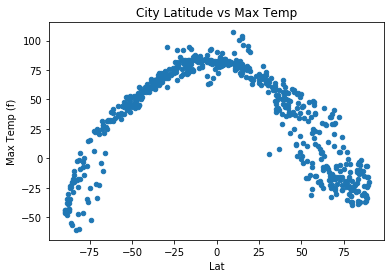

In [20]:
df1.plot(kind='scatter',x='Lat', y='Max Temp (f)')
plt.title("City Latitude vs Max Temp")
plt.show()

#### Latitude vs. Humidity Plot

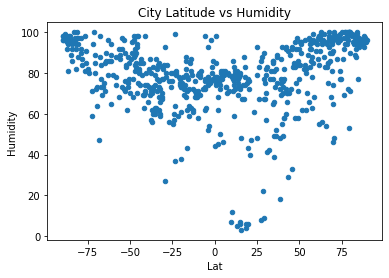

In [21]:
df1.plot(kind='scatter',x='Lat', y='Humidity')
plt.title("City Latitude vs Humidity")
plt.show()

#### Latitude vs. Cloudiness Plot

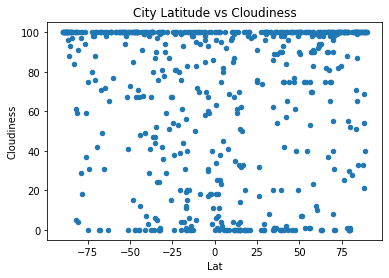

In [22]:
df1.plot(kind='scatter',x='Lat', y='Cloudiness')
plt.title("City Latitude vs Cloudiness")
plt.show()

#### Latitude vs. Wind Speed Plot

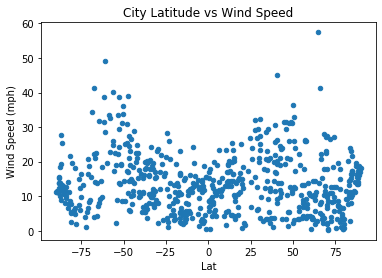

In [24]:
df1.plot(kind='scatter',x='Lat', y='Wind Speed (mph)')
plt.title("City Latitude vs Wind Speed")
plt.show()

## Linear Regression

In [25]:
# OPTIONAL: Create a function to create Linear Regression plots
def linear (df3,x,y,):
    axis_x=df3.loc[:,x]
    axis_y=df3.loc[:,y]
    correlation=st.pearsonr(axis_x, axis_y)
    print(f"Pearson R: {round(correlation[0],2)}")
    plt.scatter(axis_x, axis_y)
    (slope, intercept, rvalue, pvalue, stderr)=linregress(axis_x,axis_y)
    regress_values=axis_x*slope+intercept
    plt.plot(axis_x,regress_values, "r-")
    line_eq="y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))
    #need to automate xy
    #plt.annotate(line_eq, (0,260))

    plt.title(x + " vs " + y)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.tight_layout()
    plt.show()
    



In [26]:
# Create Northern and Southern Hemisphere DataFrames
north_df=df1.loc[df1["Lat"]>=0,:]
south_df=df1.loc[df1["Lat"]<0,:]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Pearson R: -0.92


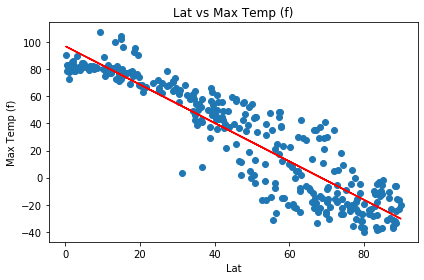

In [28]:
linear(north_df,'Lat','Max Temp (f)')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Pearson R: 0.92


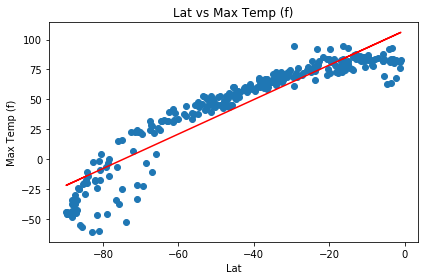

In [29]:
linear(south_df,'Lat','Max Temp (f)')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Pearson R: 0.51


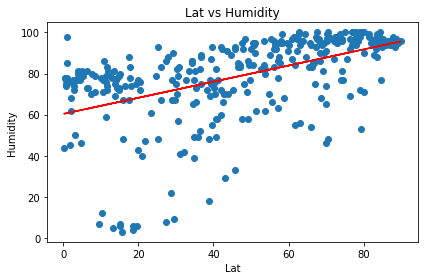

In [30]:
linear(north_df,'Lat','Humidity')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Pearson R: -0.53


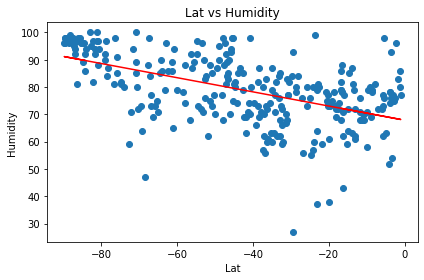

In [31]:
linear(south_df,'Lat','Humidity')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Pearson R: 0.32


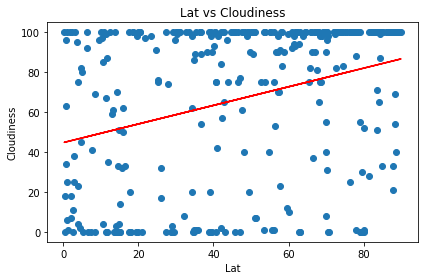

In [32]:
linear(north_df,'Lat','Cloudiness')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Pearson R: -0.28


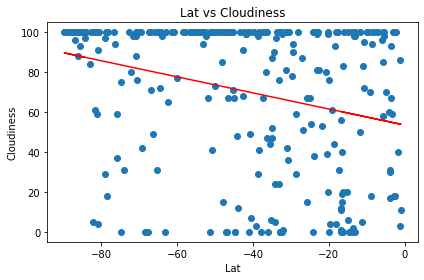

In [33]:
linear(south_df,'Lat','Cloudiness')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Pearson R: -0.05


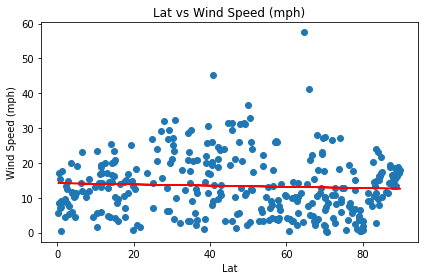

In [34]:
linear(north_df,'Lat','Wind Speed (mph)')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Pearson R: -0.18


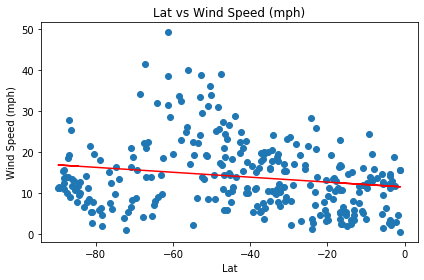

In [36]:
linear(south_df,'Lat','Wind Speed (mph)')